In [21]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from scipy.optimize import minimize
import joblib

# Load dataset
data = pd.read_csv(r'C:\Users\oluwahillz\Desktop\LG COPERATION MODEL\LG Dataset.csv')

# Display initial data information
print(data.head())
print(data.describe())
print(data.info())

   customer_id  age  income  location  purchase_frequency  brand_loyalty  \
0            1   56   25287  Suburban                   2       0.404645   
1            1   56   25287  Suburban                   2       0.404645   
2            1   56   25287  Suburban                   2       0.404645   
3            1   56   25287  Suburban                   2       0.404645   
4            1   56   25287  Suburban                   2       0.404645   

   price_sensitivity  product_id  competitor_price      price       sales  \
0           0.559186           1         94.003795  22.322694  357.824912   
1           0.559186           2         38.536590  40.691538   38.885082   
2           0.559186           3         94.540151  26.895527  336.508905   
3           0.559186           4         43.166589  83.908018 -164.343472   
4           0.559186           5         14.857279  92.327851 -322.217258   

   customer_segment  
0                 1  
1                 1  
2             

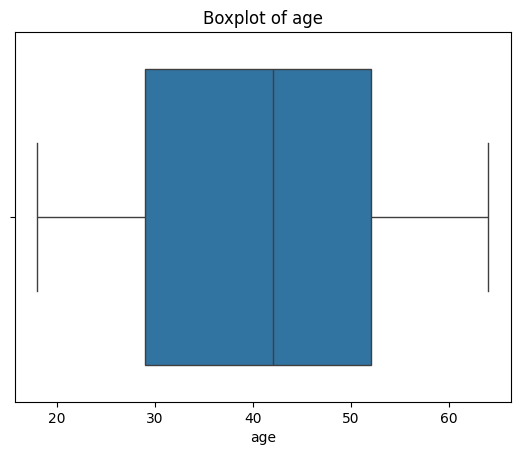

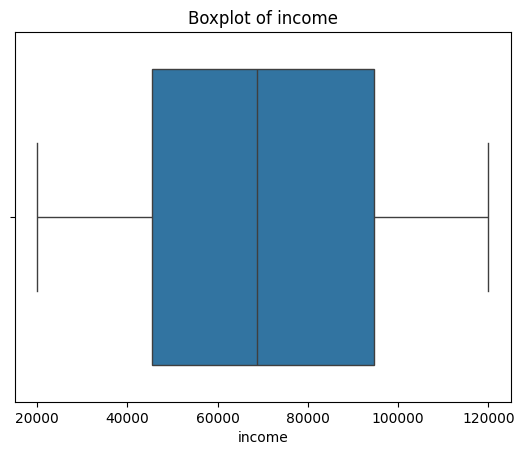

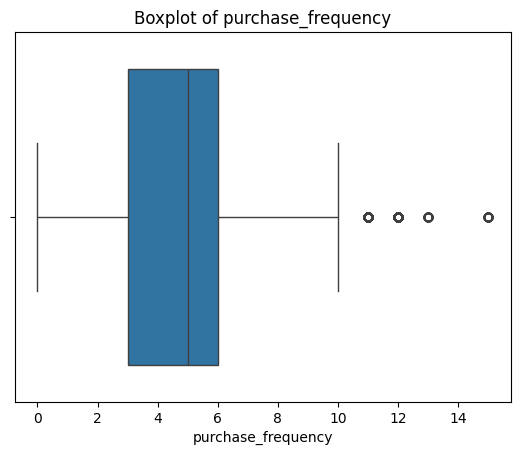

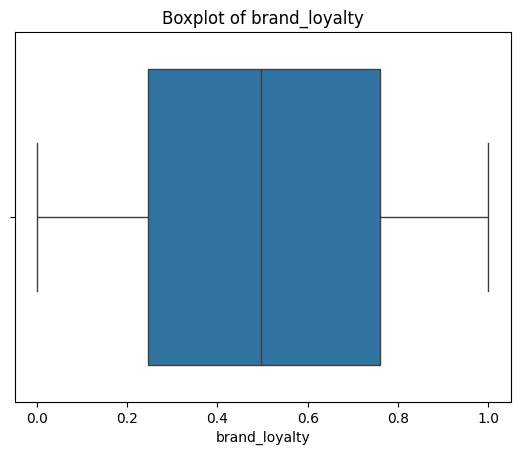

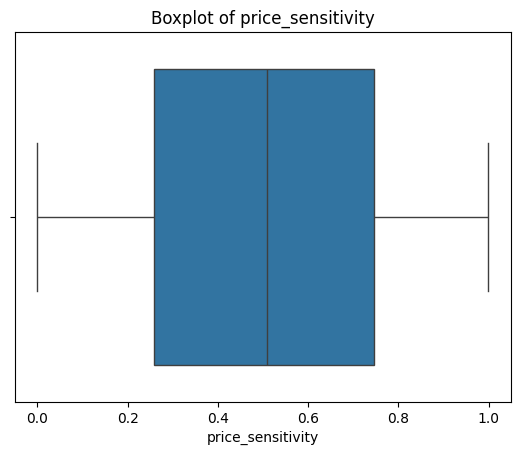

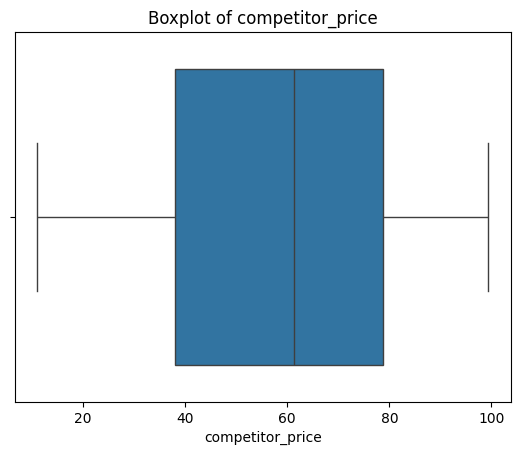

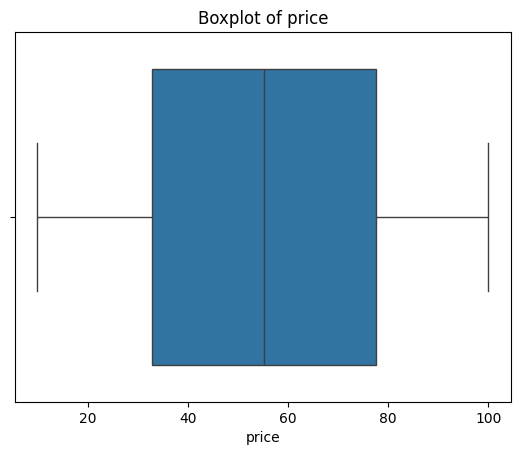

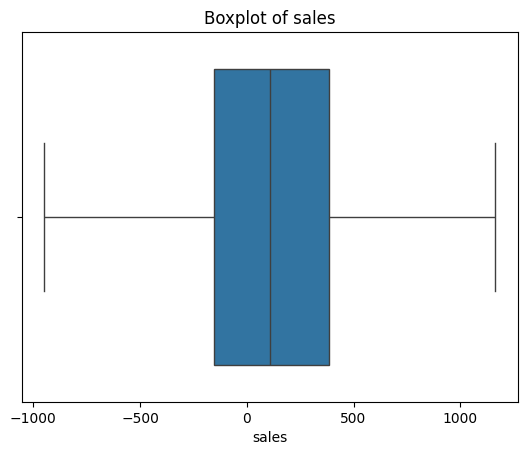

In [22]:
# Check for outliers in numerical columns
numerical_cols = ['age', 'income', 'purchase_frequency', 'brand_loyalty', 'price_sensitivity', 
                   'competitor_price', 'price', 'sales']

for col in numerical_cols:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


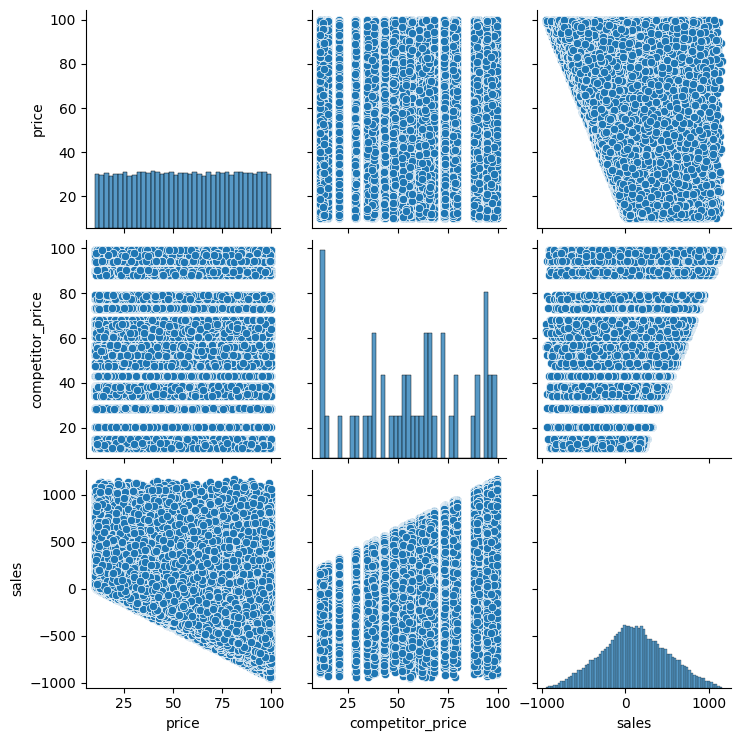

In [23]:
# Pairplot for selected features
sns.pairplot(data[['price', 'competitor_price', 'sales']])
plt.show()

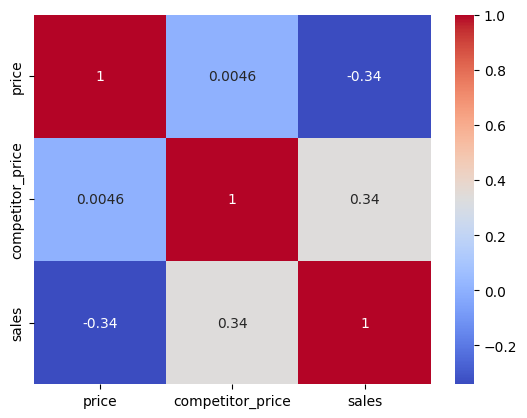

In [24]:
# Correlation matrix
correlation_matrix = data[['price', 'competitor_price', 'sales']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [25]:
# Linear Regression Model
X = data[['price', 'competitor_price']]
y = data['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 120038.08484925542


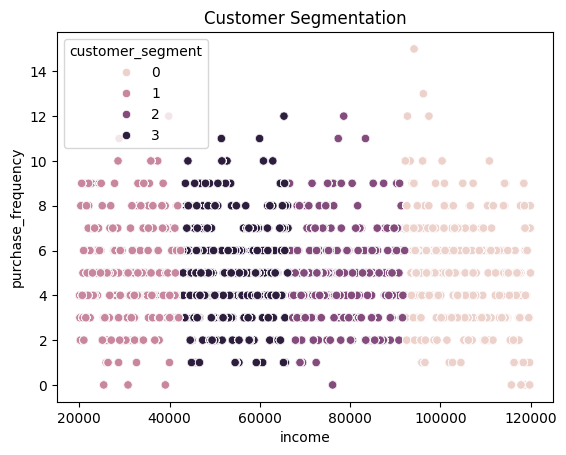

In [26]:
# Customer Segmentation
features = data[['age', 'income', 'purchase_frequency', 'brand_loyalty', 'price_sensitivity']]

kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust number of clusters as needed
data['customer_segment'] = kmeans.fit_predict(features)

sns.scatterplot(x='income', y='purchase_frequency', hue='customer_segment', data=data)
plt.title('Customer Segmentation')
plt.show()

In [27]:
# Demand Elasticity and Pricing Optimization
def objective_function(prices, cost):
    prices = np.array(prices)  # Ensure prices is a numpy array
    competitor_prices = np.full_like(prices, data['competitor_price'].mean())
    predicted_sales = model.predict(pd.DataFrame({'price': prices, 'competitor_price': competitor_prices}))
    revenue = prices * predicted_sales
    profit = revenue - cost * predicted_sales
    return -profit.sum()  # Return the sum of negative profits


In [28]:
# Initial prices for optimization
initial_prices = np.linspace(data['price'].min(), data['price'].max(), num=10)

# Define cost per unit (you may need to adjust this based on your dataset)
cost_per_unit = data['price'].mean() * 0.2  # Example: 20% of average price

# Perform optimization
result = minimize(objective_function, initial_prices, args=(cost_per_unit,), method='Nelder-Mead')

# Optimal price
optimal_prices = result.x
print(f'Optimal Prices: {optimal_prices}')

Optimal Prices: [44.21127798 44.21104307 44.21142734 44.21141499 44.21147811 44.2115547
 44.21119551 44.21155566 44.21086974 44.21106461]


In [30]:
# Calculate predicted sales and profit using optimal prices
competitor_prices = np.full_like(optimal_prices, data['competitor_price'].mean())
predicted_sales = model.predict(pd.DataFrame({'price': optimal_prices, 'competitor_price': competitor_prices}))
revenue = optimal_prices * predicted_sales
profit = revenue - cost_per_unit * predicted_sales

print(f'Predicted Sales: {predicted_sales}')
print(f'Revenue: {revenue}')
print(f'Profit: {profit}')



Predicted Sales: [171.14777399 171.14898549 171.1470037  171.14706739 171.14674186
 171.14634682 171.1481993  171.14634187 171.14987941 171.14887437]
Revenue: [7566.66181093 7566.67516838 7566.65331778 7566.65402    7566.65043064
 7566.64607488 7566.66650023 7566.64602028 7566.68502394 7566.67394321]
Profit: [5679.65251532 5679.65251523 5679.65251508 5679.6525151  5679.65251494
 5679.65251469 5679.65251535 5679.65251469 5679.6525148  5679.65251526]


In [31]:
# Test with edge case prices
edge_case_prices = [data['price'].min() - 10, data['price'].max() + 10]
competitor_prices = np.full_like(edge_case_prices, data['competitor_price'].mean())
predicted_sales_edge = model.predict(pd.DataFrame({'price': edge_case_prices, 'competitor_price': competitor_prices}))

print(f'Edge Case Prices: {edge_case_prices}')
print(f'Predicted Sales for Edge Cases: {predicted_sales_edge}')



Edge Case Prices: [0.0008366378026263277, 109.99764808816312]
Predicted Sales for Edge Cases: [ 399.15453592 -168.13264879]


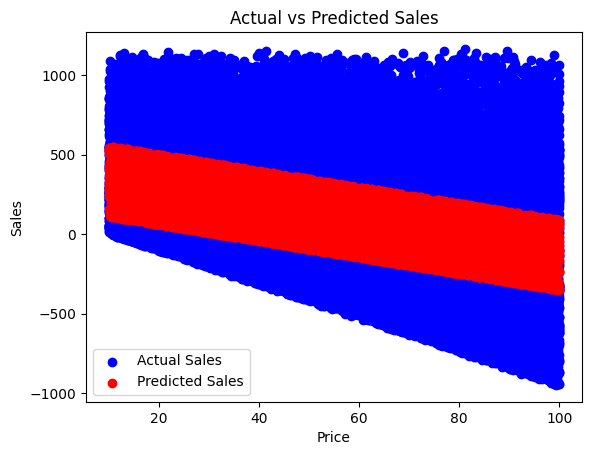

In [32]:
# Plot actual vs predicted sales
plt.scatter(data['price'], data['sales'], color='blue', label='Actual Sales')
plt.scatter(X_test['price'], y_pred, color='red', label='Predicted Sales')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [33]:
# Save the trained model
joblib.dump(model, 'demand_elasticity_model.pkl')

['demand_elasticity_model.pkl']